In [1]:
from spacepy import pycdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
cdf = pycdf.CDF("example_data/thg_l1_asf_rank_2008021005_v01.cdf")
cdf_dat = cdf.copy()

In [7]:
# asf -> all sky full
cdf.attrs

<gAttrList:
ADID_ref: NSSD0110 [CDF_CHAR]
Acknowledgement: NASA Contract NAS5-02099 [CDF_CHAR]
Data_type: ASF>All Sky Imager, Full resolution images, High resolution [CDF_CHAR]
Data_version: 1 [CDF_CHAR]
Descriptor: RANK>Rankin Inlet Canada [CDF_CHAR]
Discipline: Space Physics>Magnetospheric Science [CDF_CHAR]
            Space Physics>Ionospheric Science [CDF_CHAR]
File_naming_convention: source_datatype_descriptor [CDF_CHAR]
Generated_by: Harald Frey [CDF_CHAR]
Generation_date: 2006-10-24 [CDF_CHAR]
HTTP_LINK: http://sprg.ssl.berkeley.edu/themis [CDF_CHAR]
           http://aurora.phys.ucalgary.ca/themis [CDF_CHAR]
Instrument_type: Ground-Based VLF/ELF/ULF, Photometrics [CDF_CHAR]
LINK_TEXT: http://sprg.ssl.berkeley.edu/themis [CDF_CHAR]
           http://aurora.phys.ucalgary.ca/themis [CDF_CHAR]
LINK_TITLE: THEMIS GBO portal [CDF_CHAR]
            THEMIS-Canada portal [CDF_CHAR]
Logical_file_id: thg_l1_asf_rank_2008021005_v01 [CDF_CHAR]
Logical_source: thg_l1_asf_rank [CDF_CHAR]
Log

In [17]:
print(cdf)

range_epoch: CDF_EPOCH [2]
thg_asf_rank: CDF_UINT2 [1200, 256, 256]
thg_asf_rank_column: CDF_UINT2 [256] NRV
thg_asf_rank_epoch: CDF_EPOCH [1200]
thg_asf_rank_epoch0: CDF_EPOCH [] NRV
thg_asf_rank_row: CDF_UINT2 [256] NRV
thg_asf_rank_tend: CDF_REAL8 [1200]
thg_asf_rank_time: CDF_REAL8 [1200]


In [15]:
images = np.array(cdf_dat['thg_asf_rank'])
images

array([[[2747, 2778, 2766, ..., 2789, 2765, 2783],
        [2763, 2766, 2808, ..., 2750, 2777, 2778],
        [2782, 2761, 2764, ..., 2762, 2780, 2750],
        ...,
        [2766, 2739, 2765, ..., 2775, 2752, 2770],
        [2756, 2780, 2777, ..., 2761, 2749, 2780],
        [2760, 2775, 2761, ..., 2753, 2758, 2748]],

       [[2748, 2759, 2775, ..., 2758, 2769, 2766],
        [2764, 2770, 2785, ..., 2779, 2776, 2764],
        [2761, 2777, 2778, ..., 2780, 2757, 2796],
        ...,
        [2761, 2765, 2751, ..., 2768, 2744, 2758],
        [2773, 2775, 2757, ..., 2773, 2756, 2750],
        [2744, 2760, 2787, ..., 2752, 2750, 2754]],

       [[2757, 2778, 2737, ..., 2781, 2742, 2749],
        [2770, 2806, 2764, ..., 2764, 2787, 2793],
        [2764, 2775, 2777, ..., 2782, 2757, 2762],
        ...,
        [2783, 2761, 2766, ..., 2746, 2760, 2758],
        [2777, 2753, 2765, ..., 2787, 2765, 2758],
        [2774, 2763, 2770, ..., 2770, 2733, 2787]],

       ...,

       [[2786, 2800, 278

In [104]:
def crop_img(img, scale=1.0):
    center_x, center_y = img.shape[1] / 2, img.shape[0] / 2
    width_scaled, height_scaled = img.shape[1] * scale, img.shape[0] * scale
    left_x, right_x = center_x - width_scaled / 2, center_x + width_scaled / 2
    top_y, bottom_y = center_y - height_scaled / 2, center_y + height_scaled / 2
    img_cropped = img[int(top_y):int(bottom_y), int(left_x):int(right_x)]
    return img_cropped

images_cropped = np.array([crop_img(image, .85) for image in images])
images_cropped.shape

(1200, 217, 217)

In [110]:
def process_images(images):
    processed_images = []
    for image in images:
        processed_image = image - np.percentile(image, 1)
        processed_image = processed_image / np.percentile(image, 99)
        processed_image = np.maximum(np.zeros(processed_image.shape), processed_image)
        processed_image = np.minimum(np.ones(processed_image.shape), processed_image)
        processed_images.append(processed_image)
    return np.array(processed_images)

images_processed = process_images(images_cropped)

In [111]:
def show_image(image, h=256, w= 256):
    "Helper function to plot a single image."
    plt.imshow(image) 
    plt.xticks(())
    plt.yticks(())

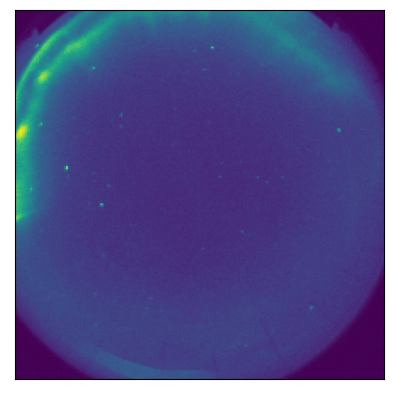

In [113]:
show_image(images_processed[1100])

In [117]:
def show_images(images, titles=None, n_row=4, n_col=5, h=256, w=256): 
    """Helper function to plot a gallery of images""" 
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row)) 
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35) 
    if titles is None:
        titles = ["" for _ in images]
    for i in range(min(n_row * n_col, len(images))):
        plt.subplot(n_row, n_col, i + 1) 
        image = images[i]
        plt.imshow(image) 
        plt.title(titles[i], size=12) 
        plt.xticks(())
        plt.yticks(())

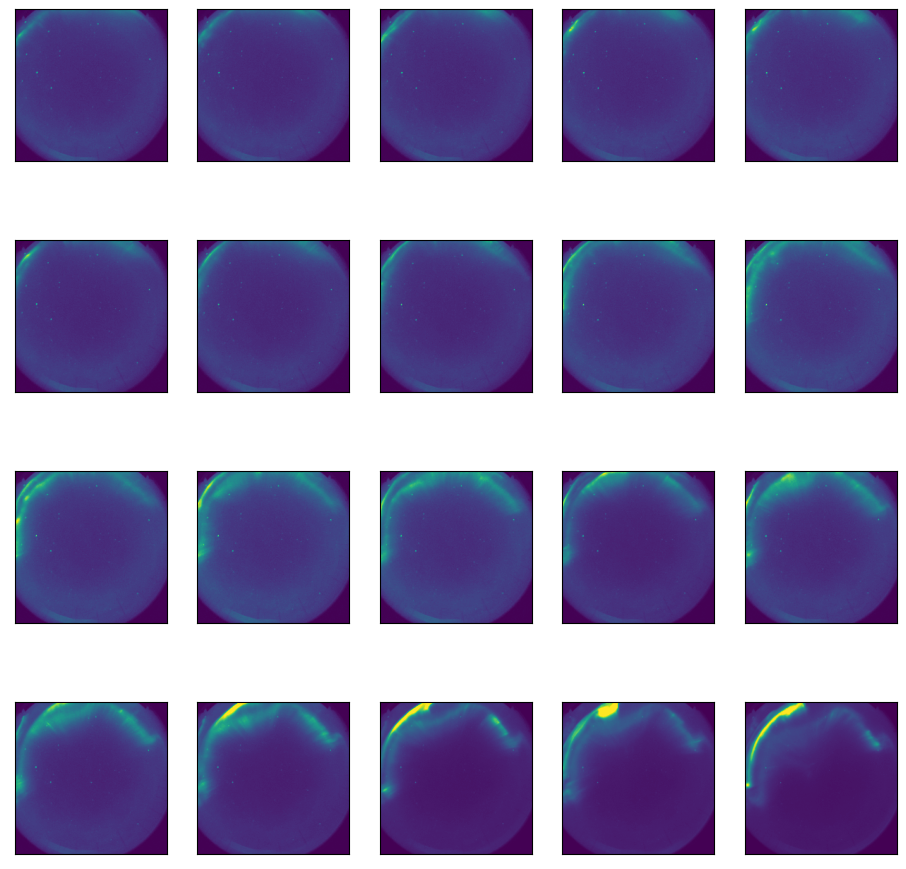

In [123]:
show_images(images_processed[1000:1200:10])

# PCA

In [130]:
from sklearn.decomposition import PCA

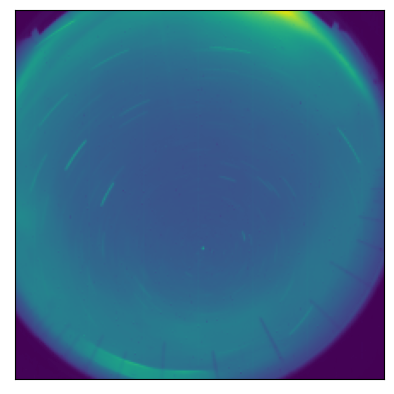

In [124]:
def center_data(X):
    X_mean = np.mean(X, axis=0)
    sub_matrix = np.array([X_mean for i in range(len(X))]) 
    X_center = X - sub_matrix
    return X_center, X_mean

X = images_processed
X, X_mean = center_data(images_processed)
show_image(X_mean)

In [142]:
nsamples, nx, ny = X.shape
d2_images_processed = X.reshape((nsamples,nx*ny))
pca = PCA(2)
converted_data = pca.fit_transform(d2_images_processed)
converted_data.shape

(1200, 2)

array([[-1.53957456,  0.08584836],
       [-1.60501237,  0.25592273],
       [-1.64737616,  0.40496986],
       ...,
       [21.39336222,  0.72649965],
       [21.31502453,  0.76967792],
       [21.85721674,  0.51593619]])

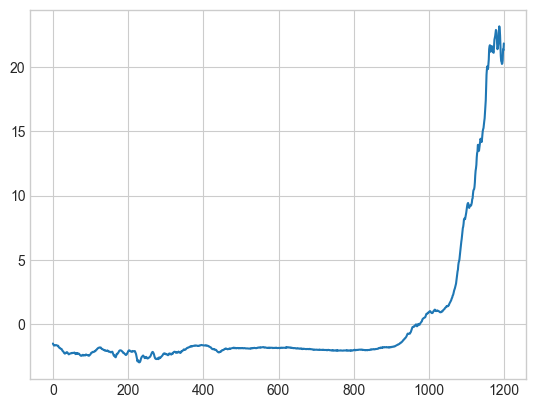

In [150]:
plt.plot(np.arange(0, len(converted_data)), [x[0] for x in converted_data])
converted_data